In [1]:
import sys
import os
from pathlib import Path
os.environ["WORKDIR"] = "/users/PAS0254/dananjaya/Taweret/subpackages/js-sims-bayes"
# You will have to change the following imports depending on where you have 
# the packages installed
# If using binder please uncomment the followings.
#sys.path.append("/home/jovyan/")
workdir = Path(os.getenv('WORKDIR', '.'))
sys.path.append(str(workdir)+"/src")
sys.path.append("/users/PAS0254/dananjaya/Taweret/")
sys.path.append("/users/PAS0254/dananjaya/.conda/envs/jstaw/")
from configurations import *
from emulator import *
#sys.path.append("/Users/dananjayaliyanage/git/Taweret")
#sys.path.append("/Users/dananjayaliyanage/git/Taweret/subpackages/SAMBA")

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
# To define priors. (uncoment if not using default priors)
#import bilby

# For other operations
import numpy as np
import bilby

Using idf = 1 : Chapman-Enskog R.T.A
SystemsInfo = 
{'Pb-Pb-2760': {'proj': 'Pb', 'targ': 'Pb', 'sqrts': 2760, 'main_design_file': '/users/PAS0254/dananjaya/Taweret/subpackages/js-sims-bayes/production_designs/design_pts_Pb_Pb_2760_production/design_points_main_PbPb-2760.dat', 'main_range_file': '/users/PAS0254/dananjaya/Taweret/subpackages/js-sims-bayes/production_designs/design_pts_Pb_Pb_2760_production/design_ranges_main_PbPb-2760.dat', 'validation_design_file': '/users/PAS0254/dananjaya/Taweret/subpackages/js-sims-bayes/production_designs/design_pts_Pb_Pb_2760_production/design_points_validation_PbPb-2760.dat', 'validation_range_file': '/users/PAS0254/dananjaya/Taweret/subpackages/js-sims-bayes/production_designs/design_pts_Pb_Pb_2760_production//design_ranges_validation_PbPb-2760.dat', 'labels': ['$N$[$2.76$TeV]', '$p$', '$\\sigma_k$', '$w$ [fm]', '$d_{\\mathrm{min}}$ [fm]', '$\\tau_R$ [fm/$c$]', '$\\alpha$', '$T_{\\eta,\\mathrm{kink}}$ [GeV]', '$a_{\\eta,\\mathrm{low}}$ [GeV${}^{

In [2]:
obs_to_remove = ['dN_dy_Lambda', 'dN_dy_Omega', 'dN_dy_Xi']

from Taweret.models import jetscape_sims_models as sims

m1 = sims.jetscape_models_pb_pb_2760(fix_MAP=False,model_num=0, obs_to_remove=obs_to_remove)
m2 = sims.jetscape_models_pb_pb_2760(fix_MAP=False,model_num=3, obs_to_remove=obs_to_remove)
exp = sims.exp_data()
g = np.linspace(0, 60, 20)

exp_data= exp.evaluate(g,obs_to_remove=obs_to_remove)

from Taweret.core.base_model import BaseModel

from Taweret.mix.bivariate_linear import BivariateLinear as BL

models= {'Grad':m1,'PTB':m2}
mix_model = BL(models_dic=models, method='calibrate_model_1', nargs_model_dic={'Grad':17, 'PTB':17}, same_parameters = True)

#uncoment to change the prior from the default
# priors = bilby.core.prior.PriorDict()
# priors['addstepasym_0'] = bilby.core.prior.Uniform(0, 60, name="addstepasym_0")
# priors['addstepasym_1'] = bilby.core.prior.Uniform(0, 60, name="addstepasym_1")
# priors['addstepasym_2'] = bilby.core.prior.Uniform(0, 1, name="addstepasym_2")
# mix_model.set_prior(priors)

#result = mix_model.train(x_exp=g, y_exp=exp_data[0], y_err=exp_data[1], outdir = 'outdir/samba_bivaraite', label='step_mix')
outdir = 'outdir/calibration_grad_20000_inf'
result = mix_model.train(x_exp=g, y_exp=exp_data[0], y_err=exp_data[1], outdir = outdir, label='addstepasym_mix', load_previous=True,)
#result = pd.read_csv('outdir/calibration_grad_20000_inf/addstepasym_mix_samples.txt', sep=' ')
#kwargs_for_sampler=sampler_args)

#sns.set_context('poster')
#result.plot_corner()
#plt.savefig(outdir+'/figures/'+'corner_', dpi=100)

Loading experimental data from /users/PAS0254/dananjaya/Taweret/subpackages/js-sims-bayes/HIC_experimental_data
Loading main points from /users/PAS0254/dananjaya/Taweret/subpackages/js-sims-bayes/production_designs/design_pts_Pb_Pb_2760_production/design_points_main_PbPb-2760.dat
Loading main ranges from /users/PAS0254/dananjaya/Taweret/subpackages/js-sims-bayes/production_designs/design_pts_Pb_Pb_2760_production/design_ranges_main_PbPb-2760.dat
Summary of design : 
Loading main points from /users/PAS0254/dananjaya/Taweret/subpackages/js-sims-bayes/production_designs/design_pts_Pb_Pb_2760_production/design_points_main_PbPb-2760.dat
Loading main ranges from /users/PAS0254/dananjaya/Taweret/subpackages/js-sims-bayes/production_designs/design_pts_Pb_Pb_2760_production/design_ranges_main_PbPb-2760.dat
Summary of design : 
calibrate_model_1 mixing function has 0 free parameter(s)
To change the prior use `set_prior` method
Using default priors for model
{'Grad_0': Uniform(minimum=10.0, maxim

In [3]:
result.posterior.head()

Grad_0    Grad_1    Grad_2    Grad_3    Grad_4    Grad_5    Grad_6  \
0  14.738818 -0.002594  0.996460  1.015189  0.114707  1.532895  0.108312   
1  14.441169  0.068314  1.081896  1.003757  0.568272  1.501394  0.037739   
2  15.481724  0.046428  1.102898  1.022722  2.661093  1.235019  0.078158   
3  14.549893  0.041356  0.988174  1.021102  0.363162  1.581013  0.073418   
4  14.550604  0.123381  0.803925  1.103476  0.709117  1.681642  0.122525   

     Grad_7    Grad_8    Grad_9   Grad_10   Grad_11   Grad_12   Grad_13  \
0  0.279461 -0.279183 -0.897628  0.106144  0.124297  0.175475  0.117518   
1  0.216960 -1.960161  0.854606  0.072400  0.132965  0.240042  0.100566   
2  0.219003 -1.373362 -0.363743  0.074383  0.083246  0.182282  0.103391   
3  0.294281 -0.848266 -0.515555  0.056345  0.122485  0.221192  0.128976   
4  0.222915 -1.485972 -0.592975  0.047329  0.173283  0.296971  0.117435   

    Grad_14   Grad_15   Grad_16  log_likelihood  log_prior  
0  0.693017  3.703411  0.136226      173.389376   2.999706  
1 -0.204993  4.632743  0.138215      169.766877   2.999706  
2  0.261327  7.303717  0.139251      168.683645   2.999706  
3  0.013854  2.619001  0.138165      171.172518   2.999706  
4 -0.314830  5.714143  0.138650      170.481385   2.999706

In [4]:
result.posterior.shape

(100400, 19)

In [5]:
#Model parameter names in Latex compatble form
model_param_dsgn = ['$\\theta$', 
                    '$\\gamma$',
                    '$\\beta$',
    '$N$[$2.76$TeV]',
 '$p$',
 '$\\sigma_k$',
 '$w$ [fm]',
 '$d_{\\mathrm{min}}$ [fm]',
 '$\\tau_R$ [fm/$c$]',
 '$\\alpha$',
 '$T_{\\eta,\\mathrm{kink}}$ [GeV]',
 '$a_{\\eta,\\mathrm{low}}$ [GeV${}^{-1}$]',
 '$a_{\\eta,\\mathrm{high}}$ [GeV${}^{-1}$]',
 '$(\\eta/s)_{\\mathrm{kink}}$',
 '$(\\zeta/s)_{\\max}$',
 '$T_{\\zeta,c}$ [GeV]',
 '$w_{\\zeta}$ [GeV]',
 '$\\lambda_{\\zeta}$',
 '$b_{\\pi}$',
 '$T_{\\mathrm{sw}}$ [GeV]']

In [6]:
len(model_param_dsgn)

20

In [7]:
bound_array = []
for param_name in mix_model.prior.keys():
    prior = mix_model.prior[param_name]
    a,b = prior.minimum, prior.maximum
    bound_array.append((a,b))
print(bound_array)

[(10.0, 20.0), (-0.7, 0.7), (0.3, 2.0), (0.5, 1.5), (0.0, 4.913), (0.3, 2.0), (-0.3, 0.3), (0.13, 0.3), (-2.0, 1.0), (-1.0, 2.0), (0.01, 0.2), (0.01, 0.2), (0.12, 0.3), (0.025, 0.15), (-0.8, 0.8), (2.0, 8.0), (0.13, 0.165)]


In [8]:
outdir

'outdir/calibration_grad_20000_inf'

In [9]:
#mix_model.mix_loglikelihood()

In [10]:
# If false, do not try to find the MAP value and load it from a saved file.
find_map_param = False
cal_name = '/map_values'
from scipy import optimize
if find_map_param == True:
    #bounds=[(a,b) for (a,b) in zip(design_min,design_max)]
    bounds= bound_array
    print(bounds)
    #x0 = [a+b/2 for a,b in bounds]
    x0 = mix_model.map
    #rslt = optimize.differential_evolution(lambda x: -cal.theta.lpdf(theta=np.array(x).reshape(-1,15)).flatten(),
    #                                        bounds=bounds,
    #                                       maxiter=100000,
    #                                        tol=1e-9,
    #                                        disp=True)
    minimizer_kwargs = {"method": "L-BFGS-B", "bounds": bounds,"tol":1e-11}
    #rslt=optimize.basinhopping(lambda x: -log_posterior(x), x0,niter=100,minimizer_kwargs=minimizer_kwargs)
    rslt=optimize.basinhopping(lambda x: -mix_model.mix_loglikelihood(x[0:3],[x[3:]],
                                                                      x_exp=g, 
                                                                      y_exp=exp_data[0], 
                                                                      y_err=exp_data[1]), 
                               x0,niter=100,minimizer_kwargs=minimizer_kwargs)
    map_values = rslt.x
    np.save(outdir+cal_name, map_values)
else:
    map_values = np.load(outdir+cal_name+'.npy')

In [11]:
map_values

array([14.79318613,  0.03395742,  1.02676353,  1.04643035,  0.44601445,
        1.44365682,  0.07018545,  0.19387591, -1.64790605, -0.07878616,
        0.11064902,  0.2       ,  0.27234768,  0.06123436, -0.61494022,
        5.84609836,  0.13709654])

In [12]:
mix_model.map

array([14.53378466,  0.05879655,  0.99576721,  1.05055448,  0.95988758,
        1.54388698,  0.0641253 ,  0.18501046, -1.32556613,  0.07107488,
        0.11012863,  0.19483565,  0.25709577,  0.10190209,  0.08147932,
        6.09774371,  0.13740234])

In [13]:
map_values=np.insert(map_values,0,0)
map_values=np.insert(map_values,0,0)
map_values=np.insert(map_values,0,0)

In [14]:
mix_model.mix_loglikelihood(map_values[0:3], [map_values[3:]], x_exp=g, y_exp=exp_data[0], y_err=exp_data[1])

178.24152482917668

In [15]:
mix_model.mix_loglikelihood([0,0,0], [mix_model.map], x_exp=g, y_exp=exp_data[0], y_err=exp_data[1])

176.76256414983948

In [16]:
#samples_df.head()

In [17]:
random_df = pd.DataFrame()
random_df['mix_0'] = np.random.uniform(0,60,100400)
random_df['mix_1'] = np.random.uniform(0,60,100400)
random_df['mix_2'] = np.random.uniform(0,1,100400)

In [18]:
random_df.head()

mix_0      mix_1     mix_2
0  25.021320  42.051667  0.457496
1  43.219470  45.003423  0.960267
2   0.006862  11.111434  0.727867
3  18.139954  15.666160  0.102741
4   8.805353  10.937859  0.340528

In [19]:
prior_df_temp = pd.DataFrame(mix_model.prior.sample(100400))
prior_df_temp = pd.concat([random_df, prior_df_temp],axis=1)
print(prior_df_temp.shape)
prior_df = pd.DataFrame(prior_df_temp.values, columns=model_param_dsgn)

(100400, 20)


In [20]:
prior_df.head()

$\theta$   $\gamma$   $\beta$  $N$[$2.76$TeV]       $p$  $\sigma_k$  \
0  25.021320  42.051667  0.457496       15.361406  0.258893    1.265462   
1  43.219470  45.003423  0.960267       14.977300 -0.327625    0.833157   
2   0.006862  11.111434  0.727867       16.117196 -0.577778    1.438707   
3  18.139954  15.666160  0.102741       18.597891  0.055649    0.468837   
4   8.805353  10.937859  0.340528       10.244509  0.533819    0.818095   

   $w$ [fm]  $d_{\mathrm{min}}$ [fm]  $\tau_R$ [fm/$c$]  $\alpha$  \
0  1.424831                 1.666277           1.016840  0.227440   
1  0.792369                 1.260186           1.538420  0.077343   
2  0.621154                 0.254167           1.293087 -0.278461   
3  1.087105                 1.110855           0.373046  0.099292   
4  0.922890                 0.542140           1.752800  0.104080   

   $T_{\eta,\mathrm{kink}}$ [GeV]  $a_{\eta,\mathrm{low}}$ [GeV${}^{-1}$]  \
0                        0.197603                               -0.888830   
1                        0.293657                                0.214470   
2                        0.230488                               -0.337084   
3                        0.281536                                0.634352   
4                        0.275482                                0.676748   

   $a_{\eta,\mathrm{high}}$ [GeV${}^{-1}$]  $(\eta/s)_{\mathrm{kink}}$  \
0                                -0.819719                    0.085703   
1                                 0.374222                    0.135961   
2                                 1.053918                    0.187869   
3                                 0.568300                    0.047831   
4                                 0.998607                    0.173004   

   $(\zeta/s)_{\max}$  $T_{\zeta,c}$ [GeV]  $w_{\zeta}$ [GeV]  \
0            0.186904             0.264697           0.103881   
1            0.183031             0.224159           0.083673   
2            0.127147             0.189312           0.068809   
3            0.178305             0.167937           0.116333   
4            0.062124             0.157692           0.121819   

   $\lambda_{\zeta}$  $b_{\pi}$  $T_{\mathrm{sw}}$ [GeV]  
0           0.554062   3.412794                 0.160177  
1           0.530673   7.358631                 0.139258  
2           0.330087   2.391338                 0.164196  
3           0.053351   6.708776                 0.159943  
4           0.257335   4.185880                 0.158799

In [21]:
result = result.posterior.values[:,0:-2]
result.shape

(100400, 17)

In [22]:
samples_df = pd.DataFrame(result,columns=model_param_dsgn[3:])


In [23]:
df = pd.concat([prior_df.iloc[:,0:3], samples_df], axis=1)

In [24]:
df.head()


$\theta$   $\gamma$   $\beta$  $N$[$2.76$TeV]       $p$  $\sigma_k$  \
0  25.021320  42.051667  0.457496       14.738818 -0.002594    0.996460   
1  43.219470  45.003423  0.960267       14.441169  0.068314    1.081896   
2   0.006862  11.111434  0.727867       15.481724  0.046428    1.102898   
3  18.139954  15.666160  0.102741       14.549893  0.041356    0.988174   
4   8.805353  10.937859  0.340528       14.550604  0.123381    0.803925   

   $w$ [fm]  $d_{\mathrm{min}}$ [fm]  $\tau_R$ [fm/$c$]  $\alpha$  \
0  1.015189                 0.114707           1.532895  0.108312   
1  1.003757                 0.568272           1.501394  0.037739   
2  1.022722                 2.661093           1.235019  0.078158   
3  1.021102                 0.363162           1.581013  0.073418   
4  1.103476                 0.709117           1.681642  0.122525   

   $T_{\eta,\mathrm{kink}}$ [GeV]  $a_{\eta,\mathrm{low}}$ [GeV${}^{-1}$]  \
0                        0.279461                               -0.279183   
1                        0.216960                               -1.960161   
2                        0.219003                               -1.373362   
3                        0.294281                               -0.848266   
4                        0.222915                               -1.485972   

   $a_{\eta,\mathrm{high}}$ [GeV${}^{-1}$]  $(\eta/s)_{\mathrm{kink}}$  \
0                                -0.897628                    0.106144   
1                                 0.854606                    0.072400   
2                                -0.363743                    0.074383   
3                                -0.515555                    0.056345   
4                                -0.592975                    0.047329   

   $(\zeta/s)_{\max}$  $T_{\zeta,c}$ [GeV]  $w_{\zeta}$ [GeV]  \
0            0.124297             0.175475           0.117518   
1            0.132965             0.240042           0.100566   
2            0.083246             0.182282           0.103391   
3            0.122485             0.221192           0.128976   
4            0.173283             0.296971           0.117435   

   $\lambda_{\zeta}$  $b_{\pi}$  $T_{\mathrm{sw}}$ [GeV]  
0           0.693017   3.703411                 0.136226  
1          -0.204993   4.632743                 0.138215  
2           0.261327   7.303717                 0.139251  
3           0.013854   2.619001                 0.138165  
4          -0.314830   5.714143                 0.138650

In [25]:
df.shape

(100400, 20)

In [26]:
samples_df = df

In [27]:
map_values

array([ 0.        ,  0.        ,  0.        , 14.79318613,  0.03395742,
        1.02676353,  1.04643035,  0.44601445,  1.44365682,  0.07018545,
        0.19387591, -1.64790605, -0.07878616,  0.11064902,  0.2       ,
        0.27234768,  0.06123436, -0.61494022,  5.84609836,  0.13709654])

In [28]:
from plotting import plot_corner_viscosity


/users/PAS0254/dananjaya/.conda/envs/jstaw/lib/python3.7/site-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/users/PAS0254/dananjaya/.conda/envs/jstaw/lib/python3.7/site-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/users/PAS0254/dananjaya/.conda/envs/jstaw/lib/python3.7/site-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/users/PAS0254/dananjaya/.conda/envs/jstaw/lib/python3.7/site-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in fa

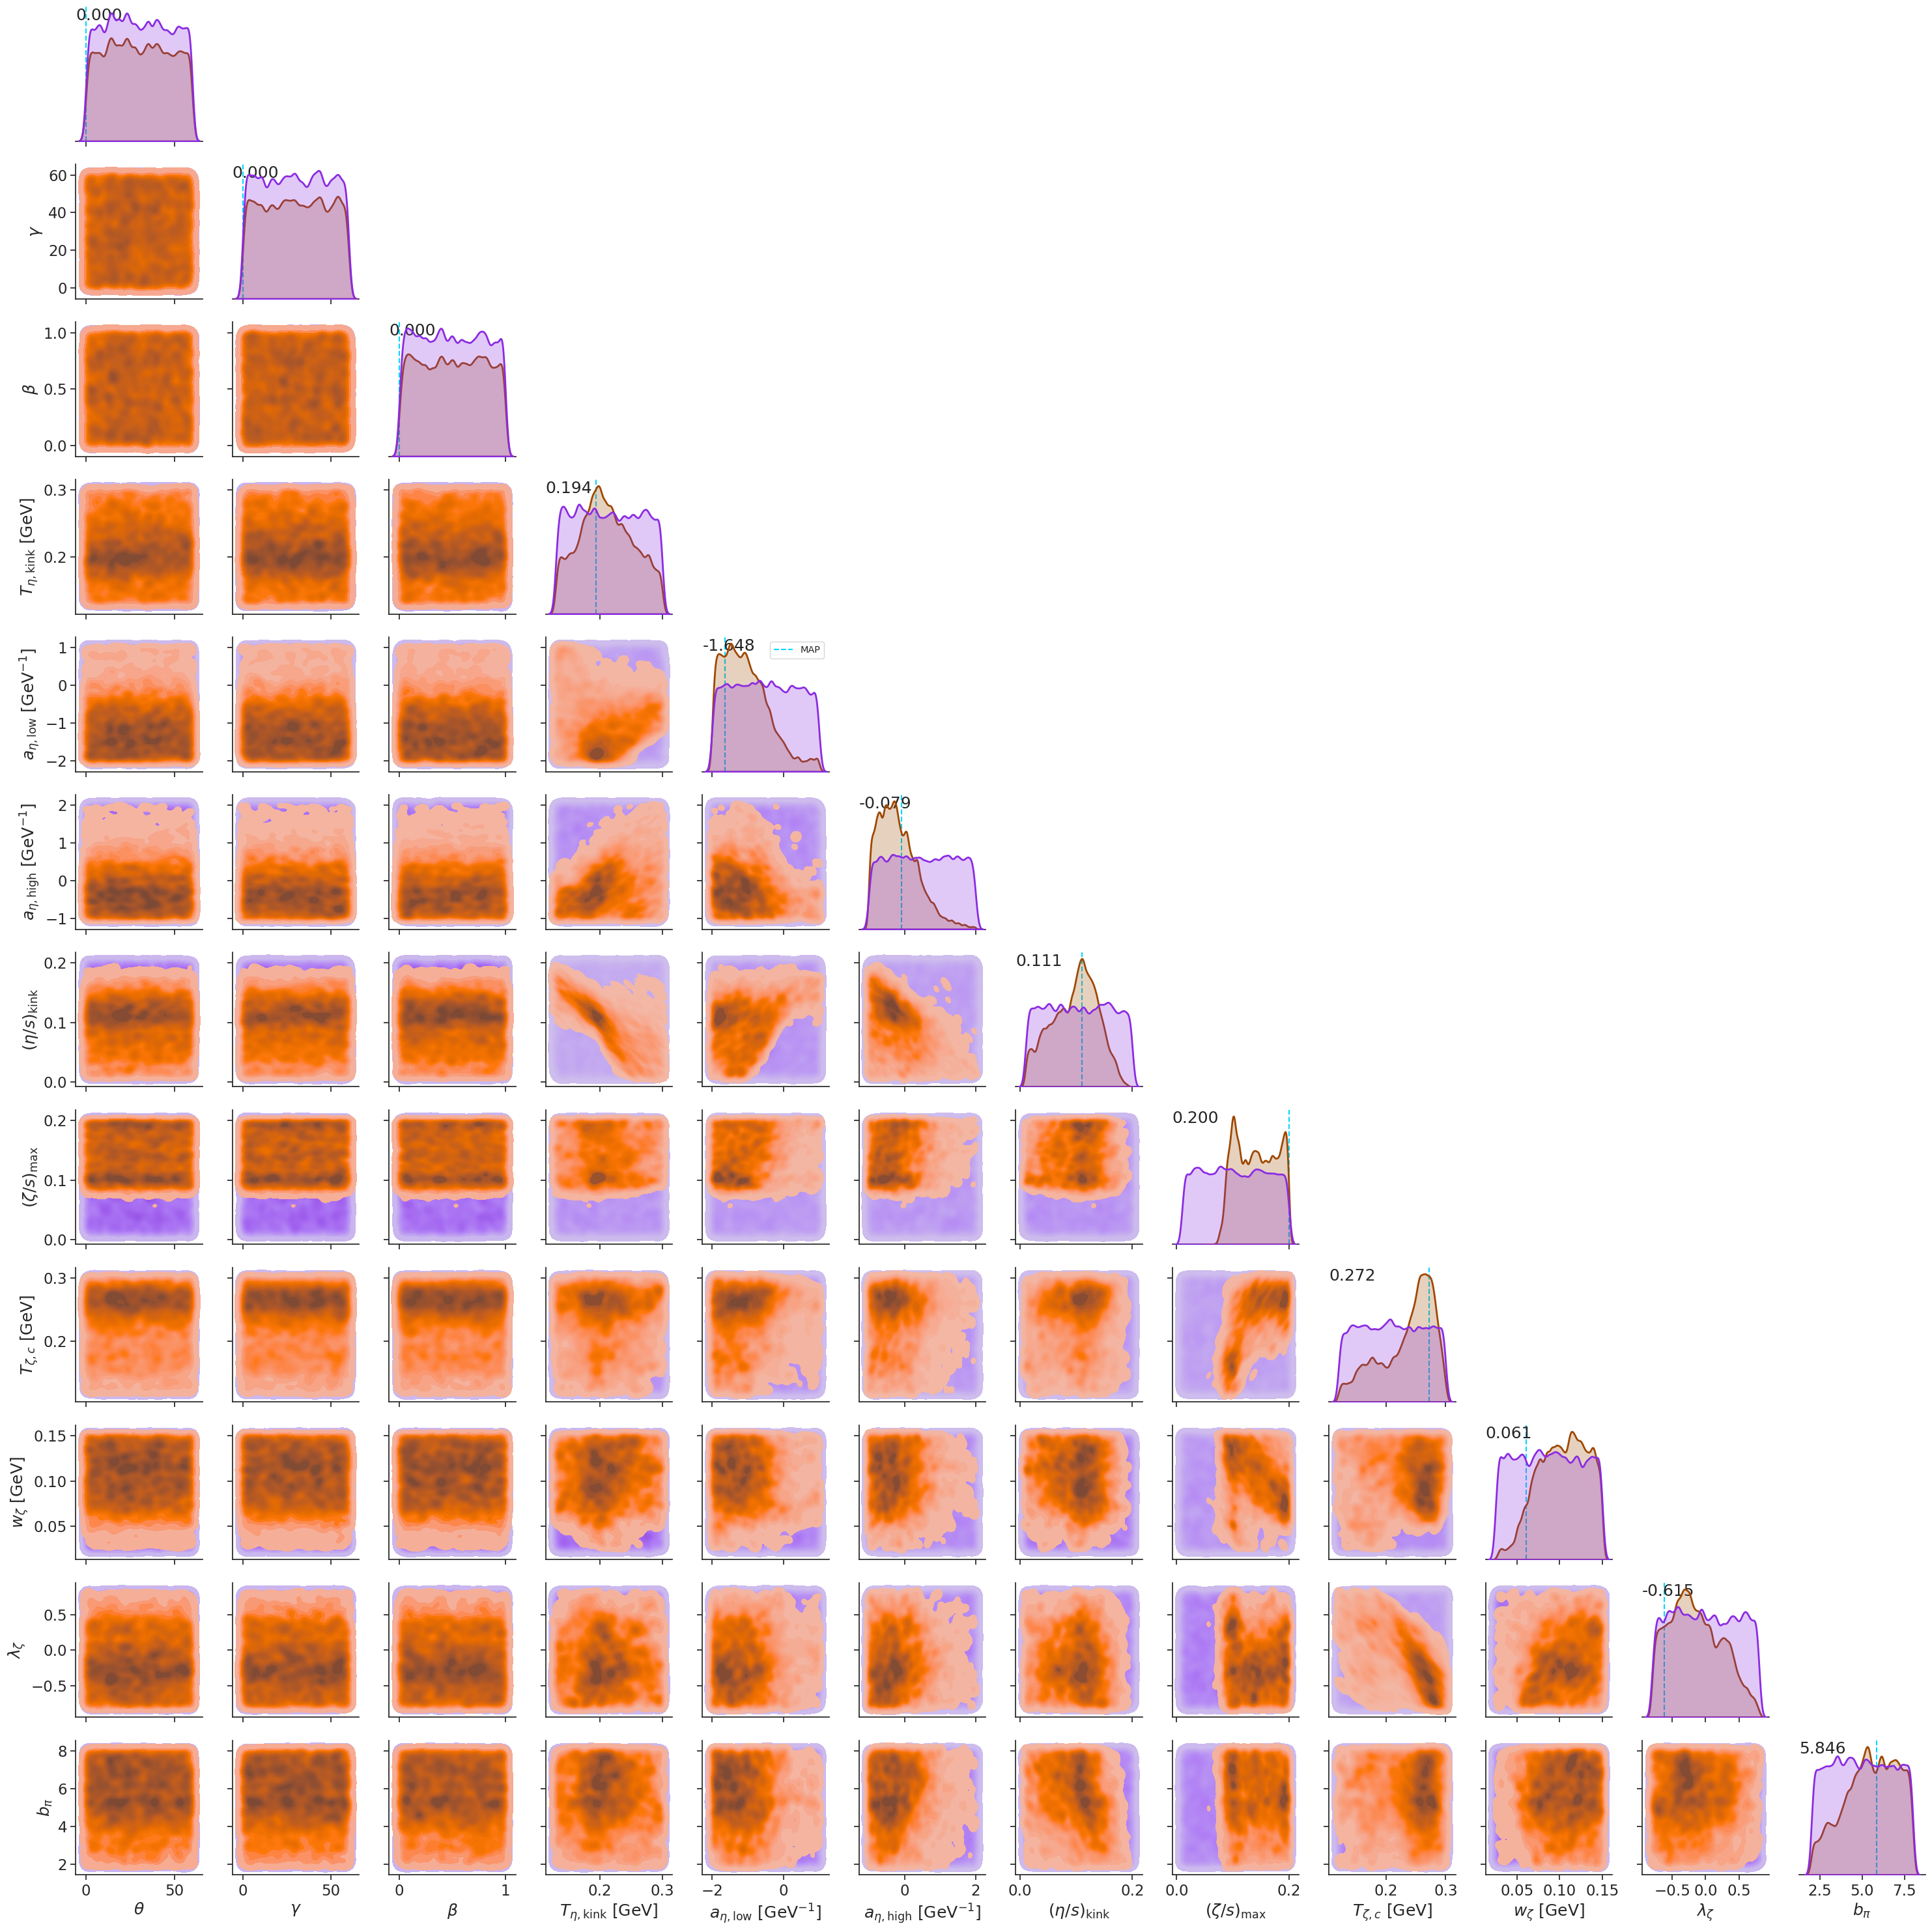

In [29]:
plot_corner_viscosity(samples_df,prior_df, outdir, n_samples=90000, prune=10, MAP=map_values, closure=None)


/users/PAS0254/dananjaya/.conda/envs/jstaw/lib/python3.7/site-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/users/PAS0254/dananjaya/.conda/envs/jstaw/lib/python3.7/site-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/users/PAS0254/dananjaya/.conda/envs/jstaw/lib/python3.7/site-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/users/PAS0254/dananjaya/.conda/envs/jstaw/lib/python3.7/site-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in fa

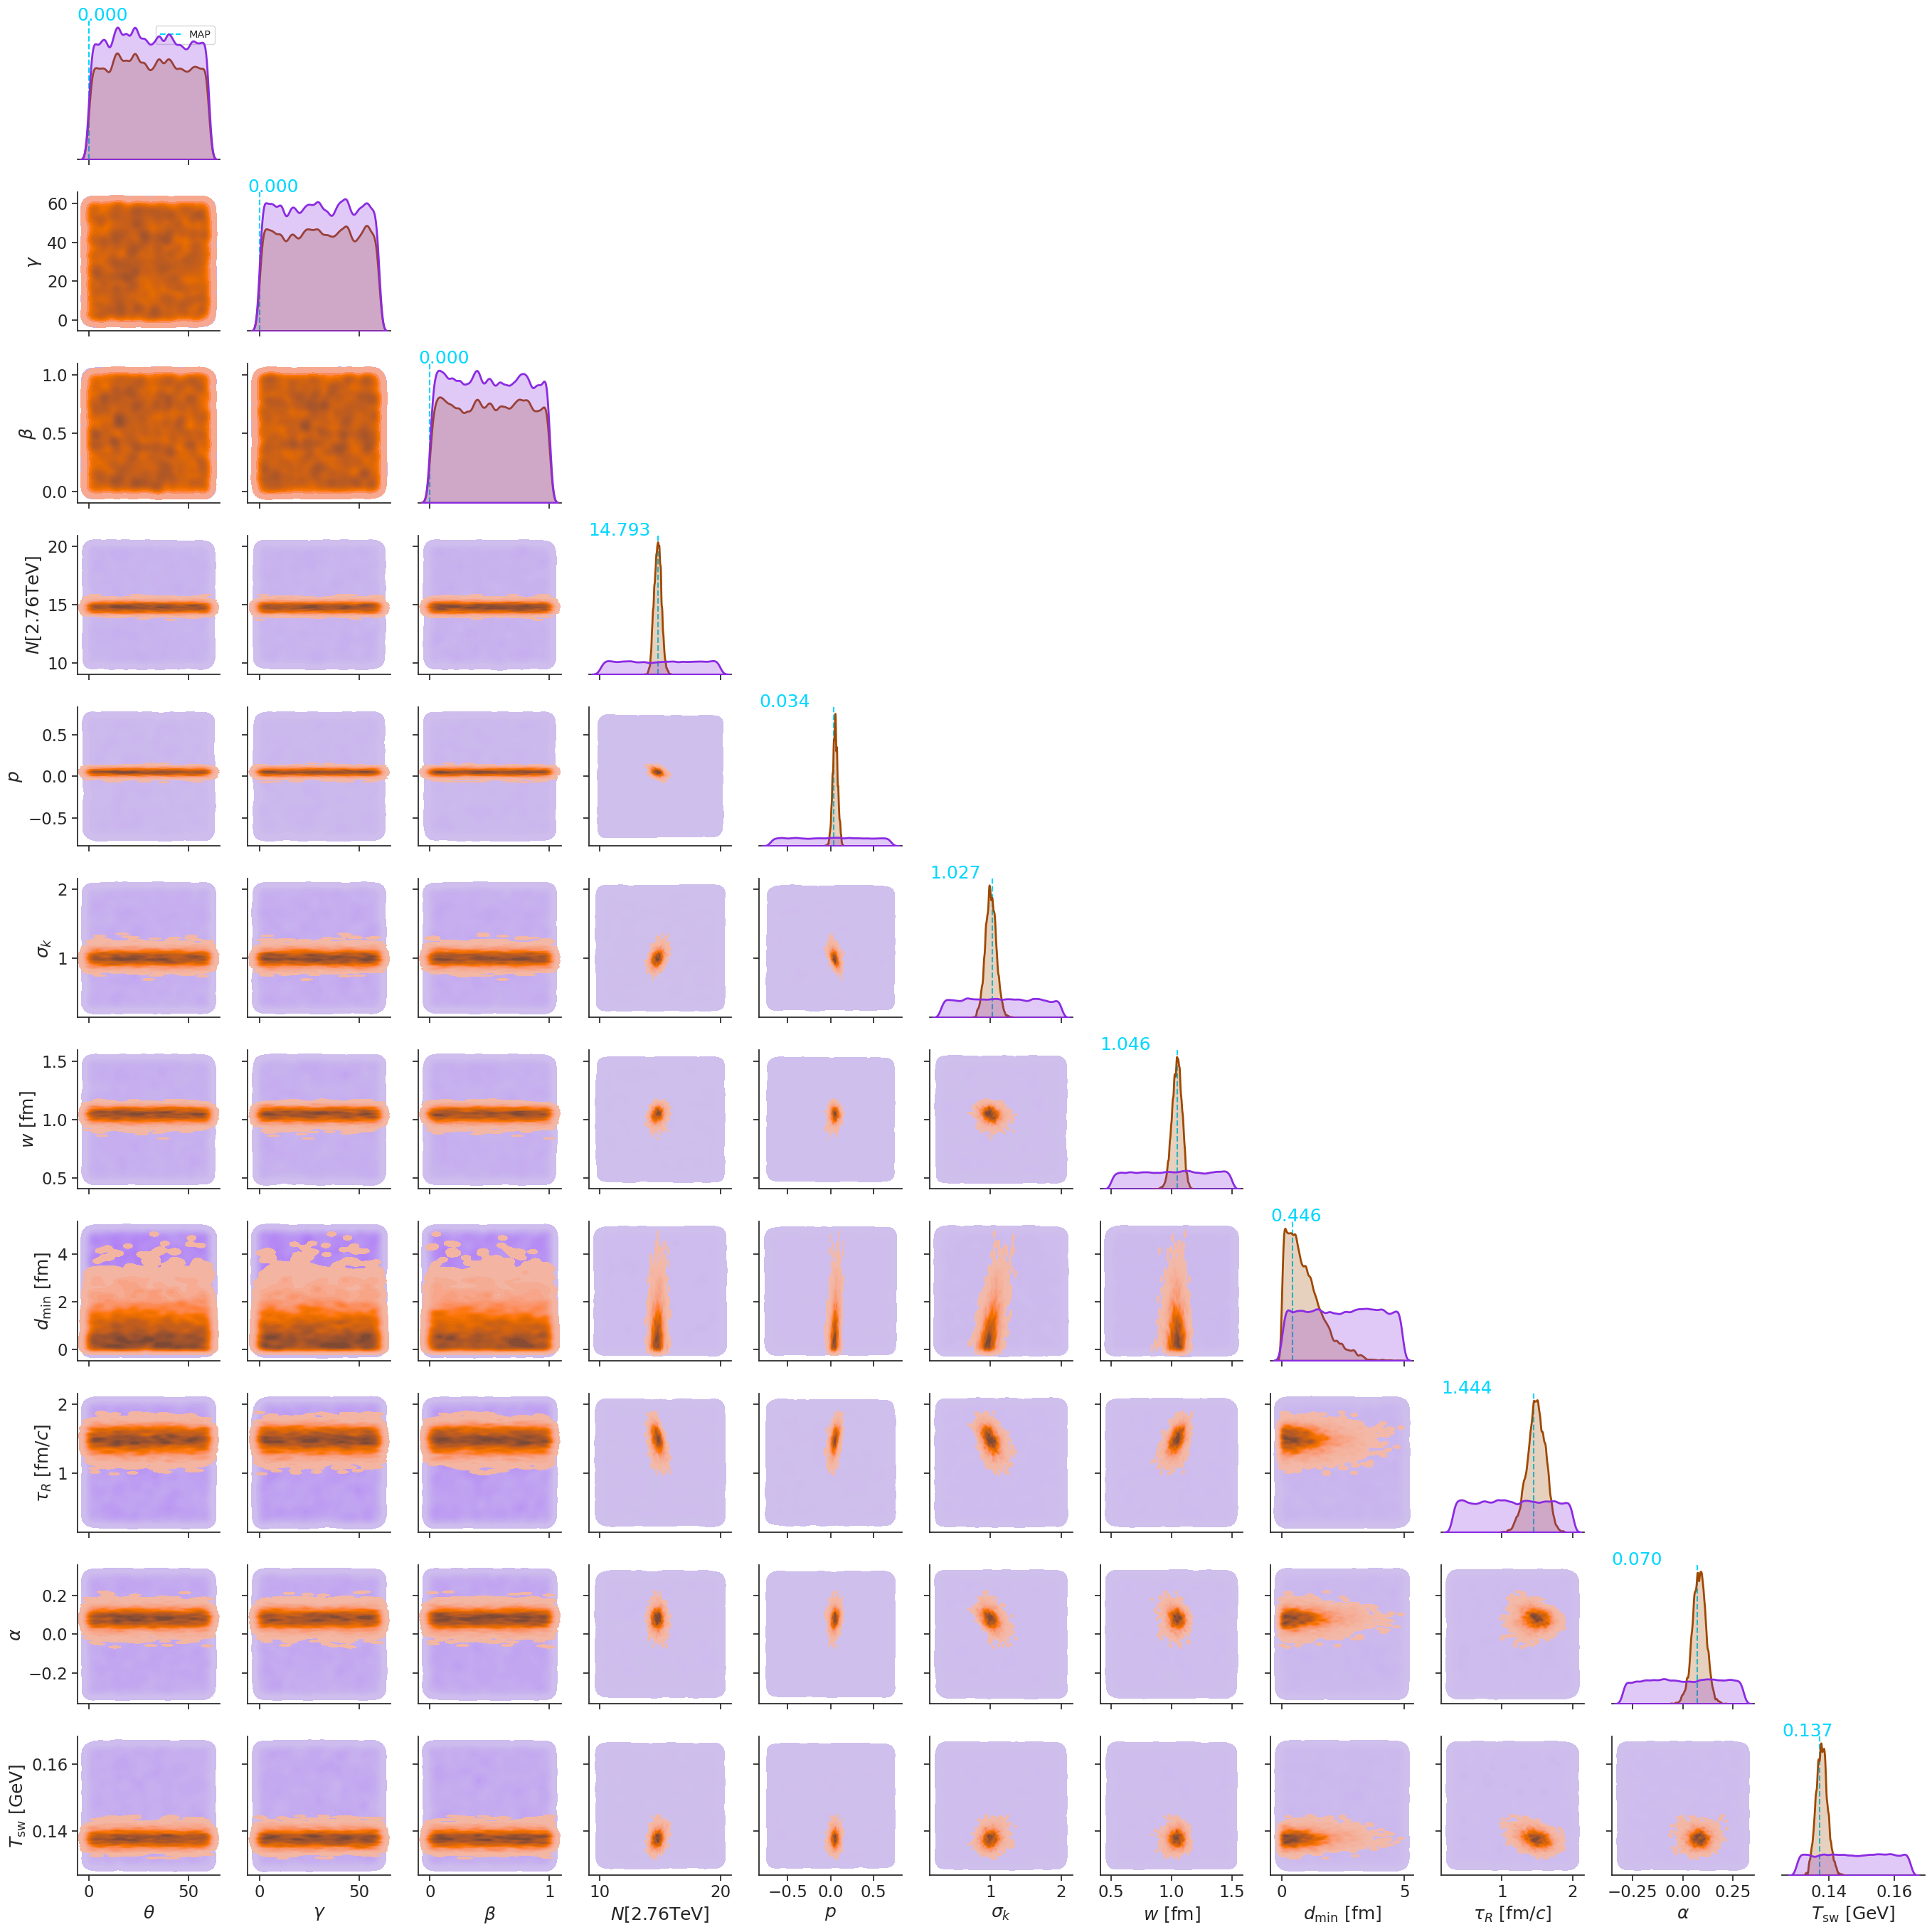

In [30]:
from plotting import plot_corner_no_viscosity
plot_corner_no_viscosity(samples_df,prior_df, outdir, n_samples=90000, prune=10, MAP=map_values, closure=None)


In [30]:
from plotting import plot_bulk, plot_shear

/users/PAS0254/dananjaya/Taweret/docs/source/notebooks/plotting.py:300: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


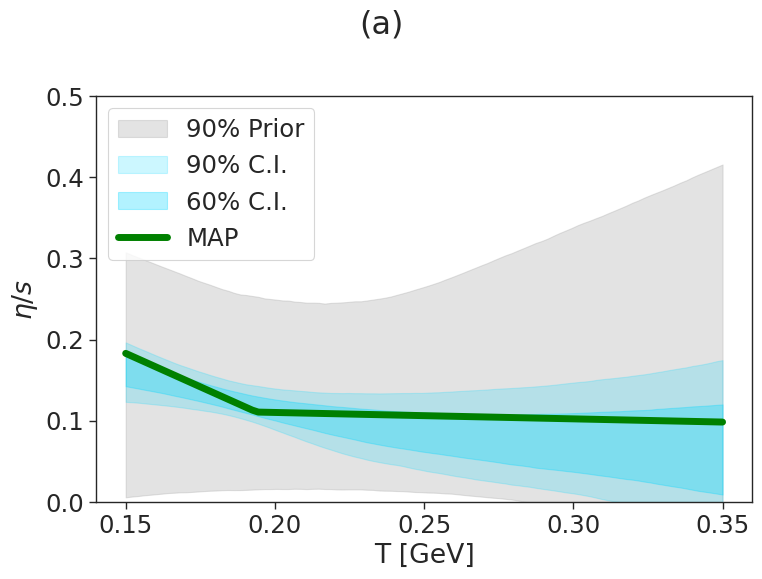

In [31]:
plot_shear(samples_df, prior_df, outdir, n_samples = 90000, prune=10, MAP=map_values, closure=None, ax= None, legend=False)

/users/PAS0254/dananjaya/Taweret/docs/source/notebooks/plotting.py:366: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


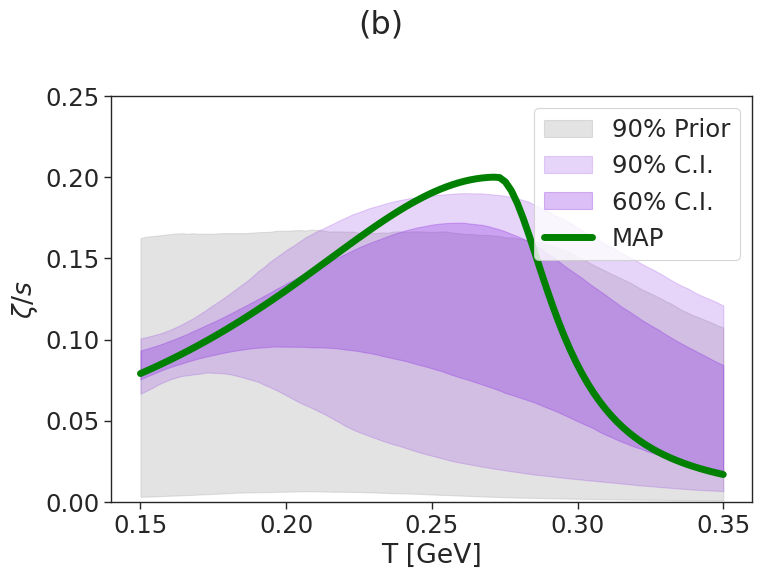

In [32]:
plot_bulk(samples_df, prior_df, outdir, n_samples =90000, prune=10, MAP=map_values, closure=None, ax= None, legend=False)

In [ ]:
# #sns.set_context("notebook", font_scale=1.5)
# sns.set_style("ticks")
# map_parameters=mix_model.map.flatten()
# sns.set_palette('bright')

# observables_to_plot=[i+3 for i in [0, 1, 2 ,3 , 4, 5, 6, 15, 16]]
# observables_to_plot = [0,1,2]+ observables_to_plot

# samples_df = pd.DataFrame(result.posterior.values[:,:-2],columns=model_param_dsgn)

# gg = sns.PairGrid(samples_df.iloc[:,observables_to_plot], corner=True, diag_sharey=False)
# gg.map_lower(sns.histplot, color=sns.color_palette()[4])
# #g.map_upper(sns.kdeplot, shade=True, color=sns.color_palette()[0])
# gg.map_diag(sns.kdeplot, linewidth=2, shade=True, color=sns.color_palette()[9])
# for n,i in enumerate(observables_to_plot):
#     ax=gg.axes[n][n]
#     ax.axvline(x=map_parameters[i], ls='--', c=sns.color_palette()[9])
#     ax.text(0,0.9,s= f'{map_parameters[i]:.3f}', transform=ax.transAxes)

# plt.tight_layout()
# plt.savefig(outdir+'/figures/'+'full_posterior_', dpi=100)
# plt.show()

In [ ]:
# sns.set_context('poster')
# result.plot_corner()

In [ ]:
#result.posterior.shape

In [ ]:
#kk =result.posterior[::1000]

In [ ]:
#kk.shape

In [35]:
g

array([ 0.        ,  3.15789474,  6.31578947,  9.47368421, 12.63157895,
       15.78947368, 18.94736842, 22.10526316, 25.26315789, 28.42105263,
       31.57894737, 34.73684211, 37.89473684, 41.05263158, 44.21052632,
       47.36842105, 50.52631579, 53.68421053, 56.84210526, 60.        ])

In [28]:
_,mean_prior,CI_prior, _ = mix_model.prior_predict(g, CI=[5,20,80,95])
_,mean,CI, _ = mix_model.predict(g, CI=[5,20,80,95], nthin=10)


(10000, 17)
using provided samples instead of posterior


In [29]:
per5, per20, per80, per95 = CI
prior5, prior20, prior80, prior95 = CI_prior

print(f'Map values {map_values}')

Map values [ 0.          0.          0.         14.79318613  0.03395742  1.02676353
  1.04643035  0.44601445  1.44365682  0.07018545  0.19387591 -1.64790605
 -0.07878616  0.11064902  0.2         0.27234768  0.06123436 -0.61494022
  5.84609836  0.13709654]


In [30]:
# _,mean_prior,CI_prior, _ = mix_model.prior_predict(g, CI=[5,20,80,95])
# _,mean,CI, _ = mix_model.predict(g, CI=[5,20,80,95])



map_prediction = mix_model.evaluate(map_values[0:3], g, [map_values[3:]])

In [31]:
# map_parameters=map_values.flatten()
# sns.set_context('poster')
# sns.set_palette('bright')
# observables_to_plot=[0, 1, 2]
# gg = sns.PairGrid(result.posterior.iloc[:,observables_to_plot], corner=True, diag_sharey=False)
# gg.map_lower(sns.histplot, color=sns.color_palette()[4])
# #g.map_upper(sns.kdeplot, shade=True, color=sns.color_palette()[0])
# gg.map_diag(sns.kdeplot, linewidth=2, shade=True, color=sns.color_palette()[9])
# for n,i in enumerate(observables_to_plot):
#     ax=gg.axes[n][n]
#     ax.axvline(x=map_parameters[i], ls='--', c=sns.color_palette()[9])
#     ax.text(0,0.9,s= f'{map_parameters[i]:.3f}', transform=ax.transAxes)

# plt.tight_layout()
# plt.savefig(outdir+'/figures/'+'posterior_', dpi=100)

In [32]:
# _,mean_w_prior,CI_w_prior, _ = mix_model.predict_weights(g, CI=[5,20,80,95], samples=prior_df.values)
# _,mean_w,CI_w, _ = mix_model.predict_weights(g, CI=[5,20,80,95])


In [33]:
# per5_w, per20_w, per80_w, per95_w = CI_w
# prior5_w, prior20_w, prior80_w, prior95_w = CI_w_prior

In [34]:
# outdir

In [35]:
# #plt.show()
# map_values= mix_model.map
# w1,_ = mix_model.evaluate_weights(map_values[0:3],g)
# #w1,_ = mix_model.evaluate_weights(np.array([0.2, 0]),g)

# fig, ax = plt.subplots(figsize=(10,10))
# #ax.set_title('MAP')
# ax.plot(g, w1, label = 'MAP ' + str([f'{mp:.1f}' for mp in map_values[0:3]]))

# ax.fill_between(g,per5_w.flatten(),per95_w.flatten(),color=sns.color_palette()[4], alpha=0.4, label='90% C.I.')
# ax.fill_between(g,per20_w.flatten(),per80_w.flatten(), color=sns.color_palette()[4], alpha=0.3, label='60% C.I.')
# #ax.fill_between(g,prior20_w.flatten(),prior80_w.flatten(),color=sns.color_palette()[2], alpha=0.5, label='60% C.I. Prior')
    
# ax.set_xlabel('Centrality')
# ax.set_ylabel('Model_1 weight')
# ax.legend(loc='upper left')

# plt.tight_layout()
# plt.savefig(outdir+'/figures/'+'MAP_mixing_function_', dpi=100)
# #plt.show()

In [41]:
#g = np.linspace(0, 60, 20)
#plot_g = np.linspace(0.0,60,100)
map_mix = map_values[3:]
m1_prediction = m1.evaluate(g, map_mix)
#m2_prediction = m2.evaluate(g, map_mix)
#true_output = truth.evaluate(plot_g)
exp_data= exp.evaluate(g,obs_to_remove=obs_to_remove)

In [42]:
obs_names = list(obs_cent_list['Pb-Pb-2760'].keys())
for i in obs_to_remove:
     obs_names.remove(i)
print(obs_names)

['dNch_deta', 'dET_deta', 'dN_dy_pion', 'dN_dy_kaon', 'dN_dy_proton', 'mean_pT_pion', 'mean_pT_kaon', 'mean_pT_proton', 'pT_fluct', 'v22', 'v32', 'v42']


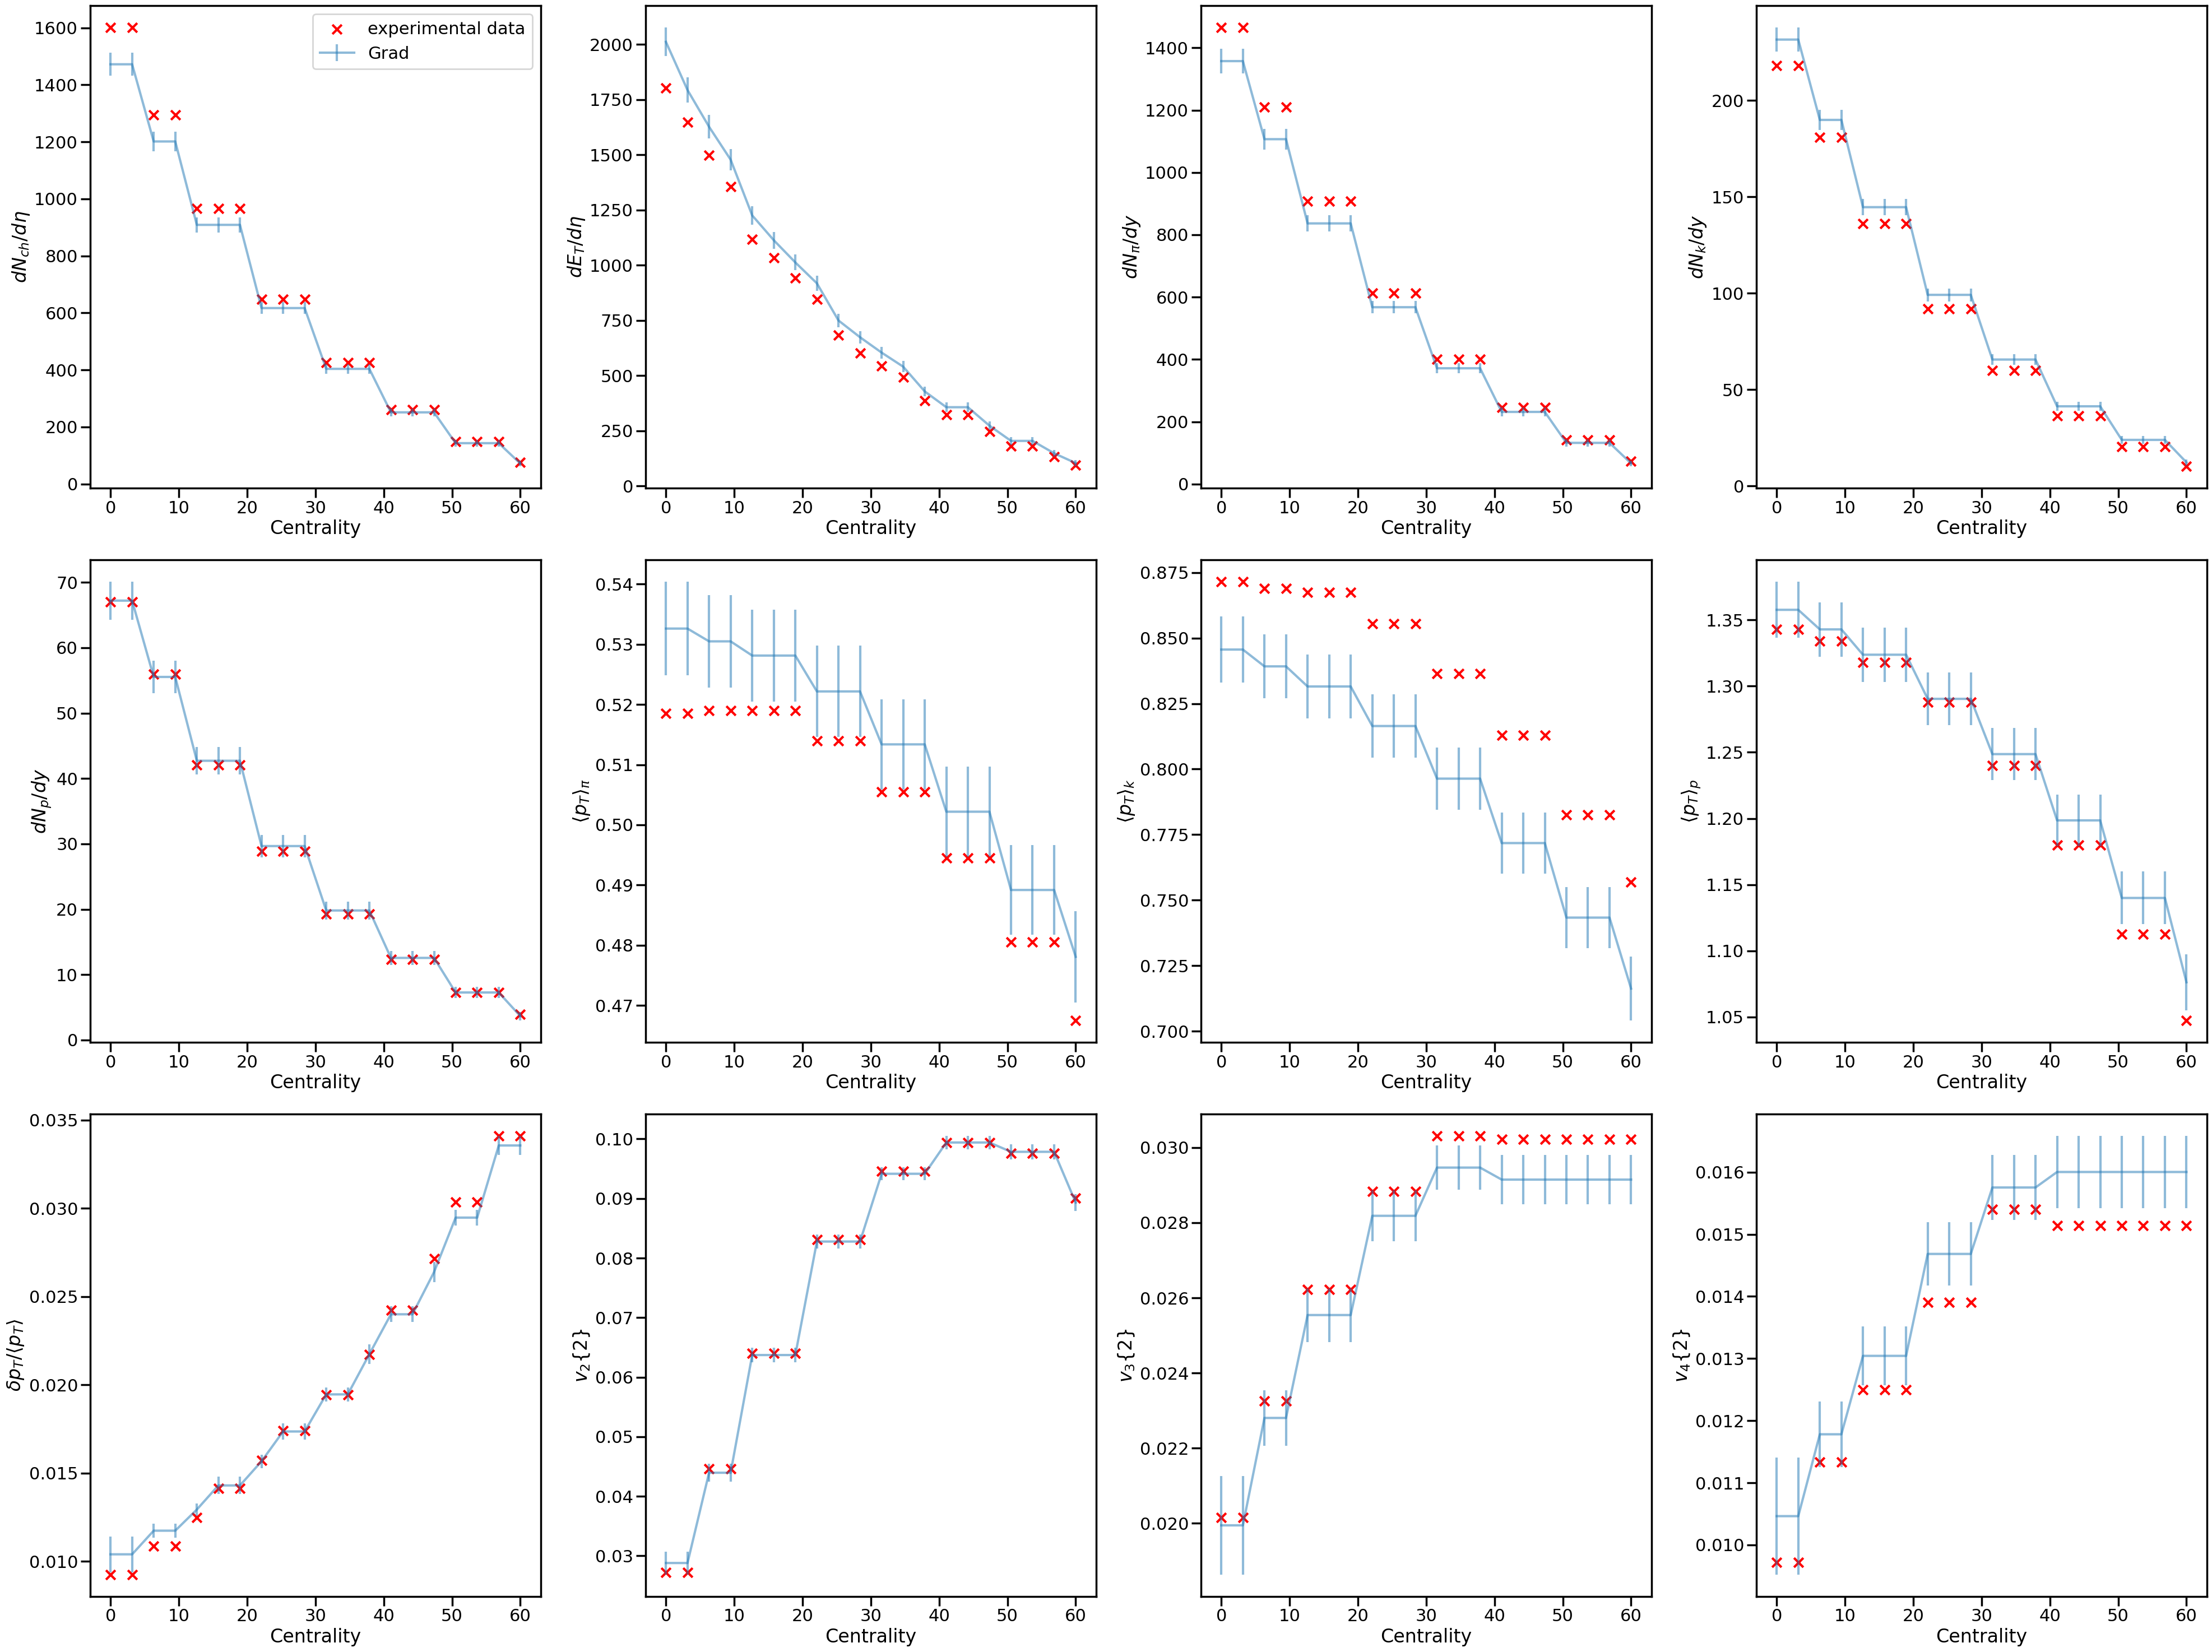

In [45]:
obs_tex_labels = {
                    'dNch_deta' : r'$dN_{ch}/d\eta$',
                    'dN_dy_pion' : r'$dN_{\pi}/dy$',
                    'dN_dy_kaon' : r'$dN_{k}/dy$',
                    'dN_dy_proton' : r'$dN_{p}/dy$',
                    'dN_dy_Lambda' : r'$dN_{\Lambda}/dy$',
                    'dN_dy_Omega' : r'$dN_{\Omega}/dy$',
                    'dN_dy_Xi' : r'$dN_{\Xi}/dy$',
                    'dET_deta' : r'$dE_{T}/d\eta$',
                    'mean_pT_pion' : r'$\langle p_T \rangle _{\pi}$',
                    'mean_pT_kaon' : r'$\langle p_T \rangle _{k}$',
                    'mean_pT_proton' : r'$\langle p_T \rangle _{p}$',
                    'pT_fluct' : r'$\delta p_T / \langle p_T \rangle$',
                    'v22' : r'$v_2\{2\}$',
                    'v32' : r'$v_3\{2\}$',
                    'v42' : r'$v_4\{2\}$',
}





fig, axs = plt.subplots(3,4, figsize=(40,30))
sns.set_context('poster')
for i in range(0,12):
    ax_f= axs.flatten()[i]
    ax_f.errorbar(g, m1_prediction[0][:,i].flatten(), 
                yerr=m1_prediction[1][:,i].flatten(), 
                label='Grad', alpha=0.5)
#     ax_f.errorbar(g, m2_prediction[0][:,i].flatten(), 
#                 yerr=m1_prediction[1][:,i].flatten(),
#                 label='PTB', alpha=0.5)
    # ax_f.plot(plot_g, m1_prediction[0][:,i].flatten(),
    #             label='Grad', alpha=0.8)
    # ax_f.plot(plot_g, m2_prediction[0][:,i].flatten(), 
    #             label='PTB', alpha=0.8)
    #ax_f.plot(g, mean[0][i,:].flatten(), label='Mean BMM')
    #ax_f.plot(g, map_prediction[i,:].flatten(), label='MAP', color='k')
    #ax_f.plot(plot_g, true_output[0], label='truth')
    ax_f.scatter(g,exp_data[0][:,i].flatten(), marker='x', label='experimental data', color='r')
    ax_f.set_xlabel('Centrality')
    #ax_f.set_ylim(1.2,3.2)
    ax_f.set_ylabel(obs_tex_labels[obs_names[i]])
    if i ==0:
        ax_f.legend()
plt.tight_layout()
fig.savefig(outdir+'/figures/'+'MAP_', dpi=100)

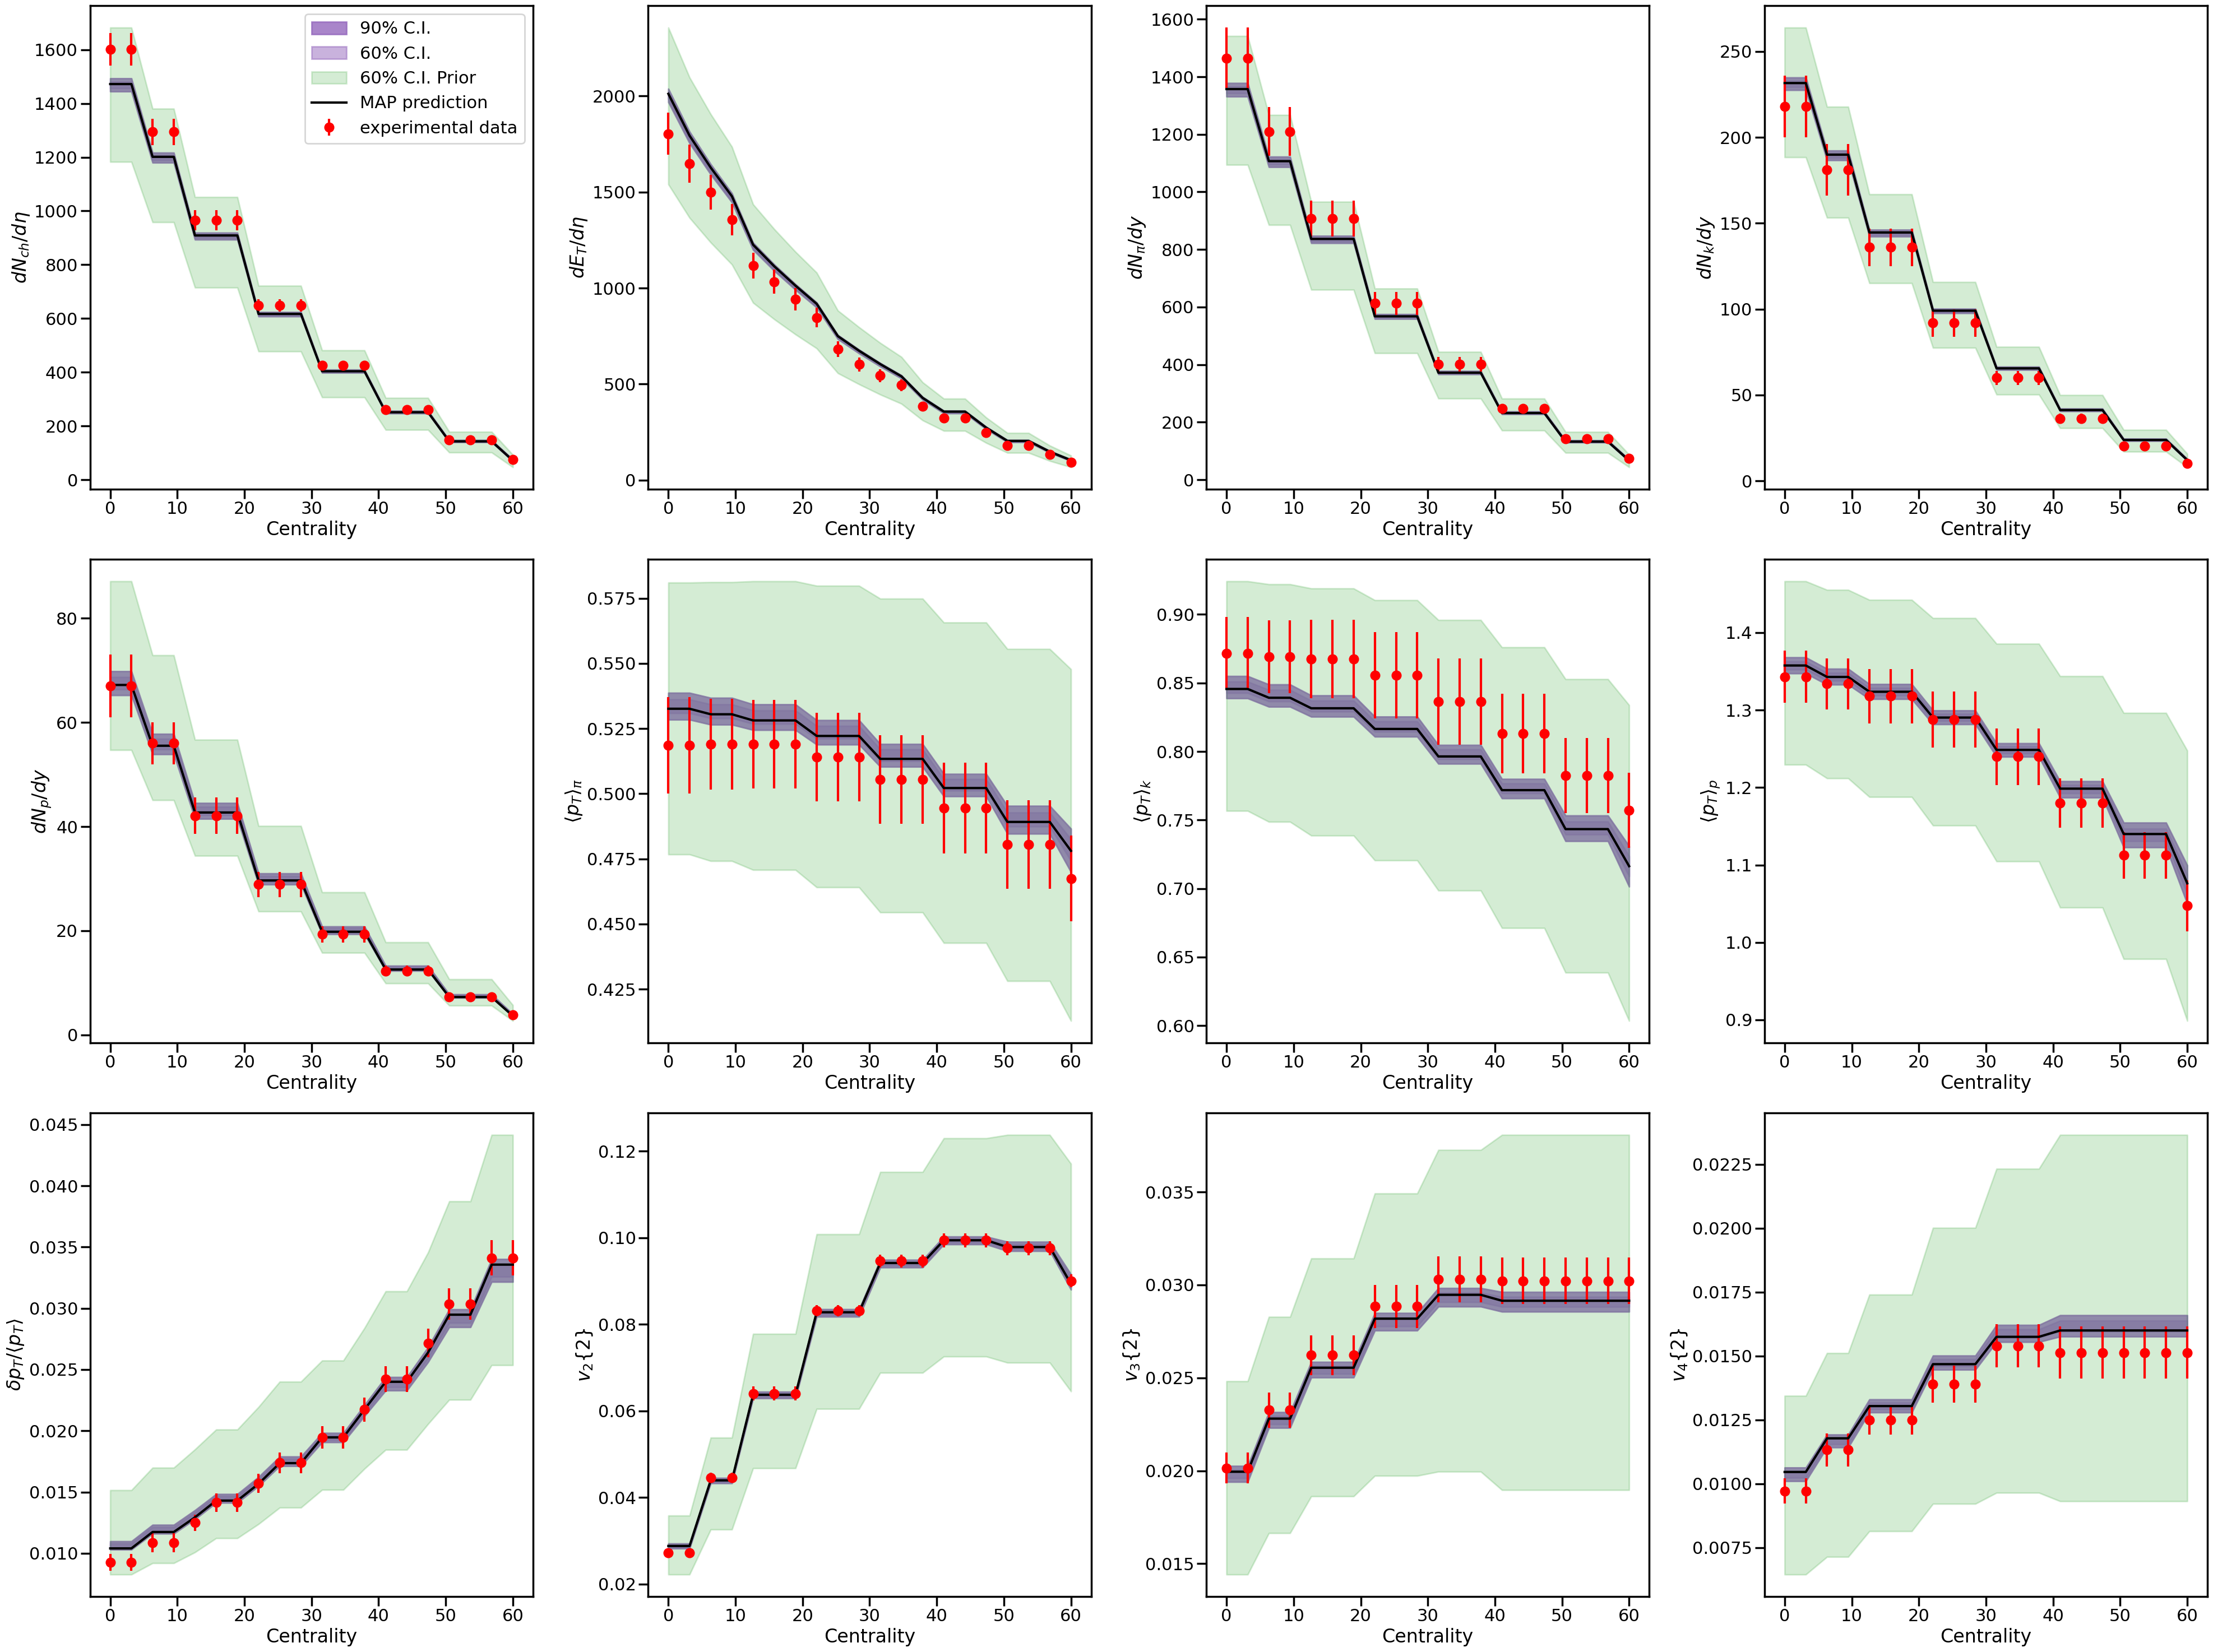

In [46]:

sns.set_context('poster')
fig, axs = plt.subplots(3, 4, figsize=(40,30))
for i in range(0,12):
    ax = axs.flatten()[i]
    #fig, ax = plt.subplots(figsize=(10,10))
    #ax.plot(plot_g, mean[0][i,:].flatten(), label='posterior mean')
    # ax_f.errorbar(plot_g, m1_prediction[0][:,i].flatten(), 
    #             yerr=m1_prediction[1][:,i].flatten(), 
    #             label='Grad', alpha=0.2)
    # ax_f.errorbar(plot_g, m2_prediction[0][:,i].flatten(), 
    #             yerr=m1_prediction[1][:,i].flatten(),
    #             label='PTB', alpha=0.2)
#     ax.plot(g, m1_prediction[0][:,i].flatten(),
#                 label='Grad', alpha=0.8)
#     ax.plot(g, m2_prediction[0][:,i].flatten(), 
#                 label='PTB', alpha=0.8)
    ax.fill_between(g,per5[0][i,:].flatten(),per95[0][i,:].flatten(),color=sns.color_palette()[4], alpha=0.8, label='90% C.I.')
    ax.fill_between(g,per20[0][i,:].flatten(),per80[0][i,:].flatten(), color=sns.color_palette()[4], alpha=0.5, label='60% C.I.')
    ax.fill_between(g,prior20[0][i,:].flatten(),prior80[0][i,:].flatten(),color=sns.color_palette()[2], alpha=0.2, label='60% C.I. Prior')
#    ax.scatter(g,exp_data[0][:,i].flatten(), marker='x', label='experimental data')
    ax.errorbar(g, exp_data[0][:,i].flatten(), 
                yerr=exp_data[1][:,i].flatten(),
                #marker='x',
                fmt='o',
                label='experimental data',
                color='r')
    #ax.plot(plot_g, mean_prior[0][i,:].flatten(), label='prior mean')
    ax.plot(g, map_prediction[i,:].flatten(), label='MAP prediction', color='k')
    ax.set_xlabel('Centrality')
    #ax_f.set_ylim(1.2,3.2)
    ax.set_ylabel(obs_tex_labels[obs_names[i]])
    if i==0:
        ax.legend()
plt.tight_layout()
fig.savefig(outdir+'/figures/'+'posterior_predict_', dpi=100)